In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/home_energy_usage.csv")

print(df.head())

print(df.info())

             Timestamp  Energy_Consumption_kWh  Temperature_C  \
0  2024-01-01 00:00:00                2.185431      33.766809   
1  2024-01-01 01:00:00                4.778214      18.624661   
2  2024-01-01 02:00:00                3.793973      16.329925   
3  2024-01-01 03:00:00                3.193963      29.822413   
4  2024-01-01 04:00:00                1.202084      26.489462   

   Solar_Intensity  Battery_Charge_%  
0        96.991205         65.114758  
1         9.390072         62.092857  
2        67.260212         35.237495  
3        44.375022         84.144755  
4        86.814225         47.128717  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               720 non-null    object 
 1   Energy_Consumption_kWh  720 non-null    float64
 2   Temperature_C           720 non-null    float64
 3   S

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


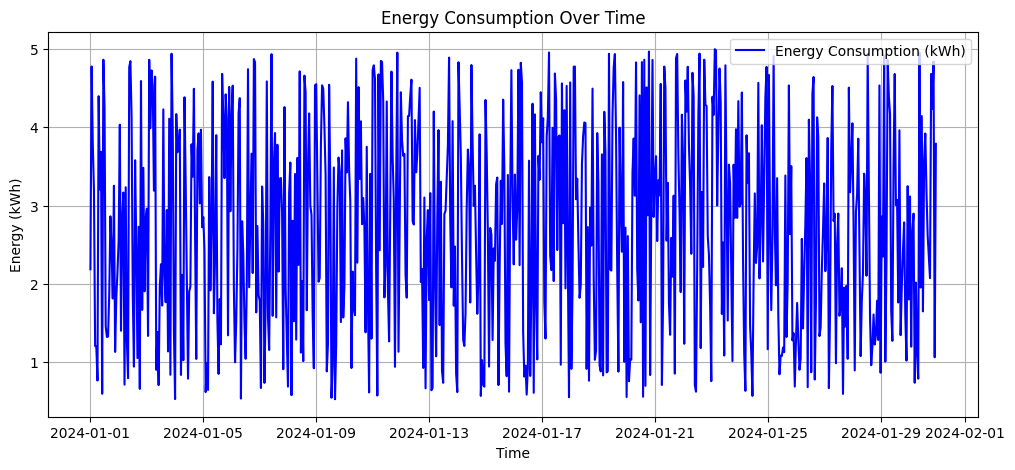

In [ ]:
# Convert Timestamp column to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])


plt.figure(figsize=(12, 5))
plt.plot(df["Timestamp"], df["Energy_Consumption_kWh"], label="Energy Consumption (kWh)", color="blue")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Energy Consumption Over Time")
plt.legend()
plt.grid(True)
plt.show()


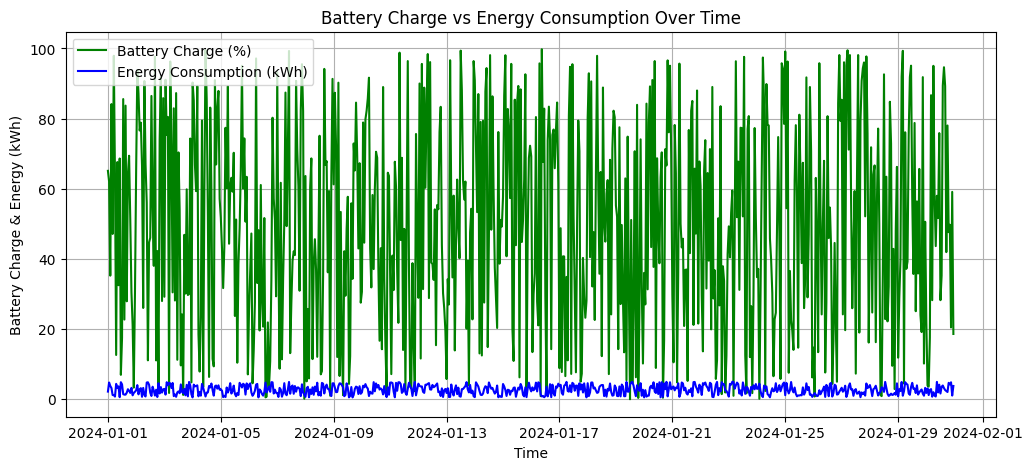

In [ ]:
# Create a figure
plt.figure(figsize=(12, 5))

# Plot Battery Charge
plt.plot(df["Timestamp"], df["Battery_Charge_%"], label="Battery Charge (%)", color="green")

# Plot Energy Consumption (on the same graph)
plt.plot(df["Timestamp"], df["Energy_Consumption_kWh"], label="Energy Consumption (kWh)", color="blue")

plt.xlabel("Time")
plt.ylabel("Battery Charge & Energy (kWh)")
plt.title("Battery Charge vs Energy Consumption Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

print(df.isnull().sum())


Timestamp                 0
Energy_Consumption_kWh    0
Temperature_C             0
Solar_Intensity           0
Battery_Charge_%          0
dtype: int64


In [ ]:

print(df.columns)

Index(['Timestamp', 'Energy_Consumption_kWh', 'Temperature_C',
       'Solar_Intensity', 'Battery_Charge_%'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Features (inputs) you want to use for prediction
X = df[["Temperature_C", "Solar_Intensity", "Battery_Charge_%"]]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the features (X)
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


   Temperature_C  Solar_Intensity  Battery_Charge_%
0       1.486752         1.628550          0.531936
1      -1.086747        -1.430295          0.427910
2      -1.476751         0.590407         -0.496565
3       0.816378        -0.208695          1.187029
4       0.249923         1.273191         -0.087219


In [ ]:
# Target variable (the value we want to predict)
y = df["Energy_Consumption_kWh"]

# Now split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")



Training data shape: (576, 3)
Test data shape: (144, 3)


In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) score: {r2}")


Mean Squared Error (MSE): 1.7765889903858403
R-squared (R2) score: -0.01884423329271856


In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(random_state=42)


rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2) score: {r2_rf}")


Random Forest - Mean Squared Error (MSE): 1.9420865472804247
Random Forest - R-squared (R2) score: -0.11375432920041684
